# A. Import Library

Di tahap awal proyek ini, kami mengimpor berbagai pustaka Python esensial yang akan mendukung seluruh proses analisis dan pemodelan data, antara lain:

- **pandas:** untuk manipulasi dan analisis data tabular.  
- **matplotlib** & **seaborn:** untuk visualisasi data yang informatif dan menarik.  
- **scikit-learn:** menyediakan tools lengkap untuk pemodelan machine learning dan preprocessing data.  
- **XGBoost:** algoritma boosting canggih untuk meningkatkan performa prediksi.  
- **numpy:** fundamental untuk komputasi numerik dan manipulasi array.

Kami juga memverifikasi versi masing-masing pustaka setelah impor guna menjamin kompatibilitas dan kemudahan reproduksi hasil.

In [1]:
import pandas as pd
print(f"Pandas version: {pd.__version__} - berhasil diimport")

import matplotlib
print(f"Matplotlib version: {matplotlib.__version__} - berhasil diimport")

import matplotlib.pyplot as plt
import seaborn as sns
print(f"Seaborn version: {sns.__version__} - berhasil diimport")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import sklearn
print(f"Scikit-learn version: {sklearn.__version__} - berhasil diimport")
print(f"XGBoost version: {XGBRegressor.__module__.split('.')[0]} loaded")
print(f"Numpy version: {np.__version__} - berhasil diimport")

print("Semua library berhasil diimport!")


Pandas version: 2.2.2 - berhasil diimport
Matplotlib version: 3.10.0 - berhasil diimport
Seaborn version: 0.13.2 - berhasil diimport
Scikit-learn version: 1.6.1 - berhasil diimport
XGBoost version: xgboost loaded
Numpy version: 2.0.2 - berhasil diimport
Semua library berhasil diimport!


Hasil:
Semua pustaka berhasil dimuat tanpa kendala, siap untuk digunakan dalam seluruh rangkaian proyek ini.


# B. Data Loading



## impor data

**Pada tahap ini, dataset dimuat dari file CSV yang tersimpan secara lokal pada path '/content/TreeCoverLoss_2001-2020_ByRegion.csv'.
Metode pd.read_csv() dari pustaka pandas digunakan untuk membaca data menjadi sebuah DataFrame yang memudahkan manipulasi dan analisis data selanjutnya**

In [2]:
file_path = '/content/TreeCoverLoss_2001-2020_ByRegion.csv'
df = pd.read_csv(file_path)

Data berhasil diimpor dan tersimpan dalam variabel df dalam format DataFrame, yang siap untuk proses eksplorasi dan pra-pemrosesan berikutnya.

## Informasi Dimensi Dataset

**Kode ini digunakan untuk menampilkan ukuran dataset dalam bentuk jumlah baris dan kolom.
Metode .shape dari DataFrame df memberikan tuple (jumlah_baris, jumlah_kolom), yang membantu kita memahami skala data yang akan diolah**

In [3]:
print(f"Dari tabel hasil di atas terdapat {df.shape[0]} baris dan {df.shape[1]} kolom pada dataset.")

Dari tabel hasil di atas terdapat 3967 baris dan 4 kolom pada dataset.


Dari output yang dihasilkan, diketahui bahwa dataset memiliki 3967 baris dan 4 kolom. Informasi ini penting sebagai gambaran awal untuk memahami seberapa besar data yang akan dianalisis dan diproses selanjutnya.

## Menampilkan Seluruh Dataset

**Pengaturan pd.set_option('display.max_rows', None) dan pd.set_option('display.max_columns', None) digunakan untuk menampilkan semua baris dan kolom dari DataFrame df saat output dipanggil.
Secara default, pandas membatasi tampilan data agar tidak terlalu panjang, sehingga opsi ini menghilangkan batasan tersebut untuk keperluan eksplorasi data secara menyeluruh
Setelah pengaturan ini, pemanggilan variabel df akan menampilkan seluruh isi dataset dalam notebook**

In [4]:
pd.set_option('display.max_rows', None)  # Menampilkan semua baris
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom

# Menampilkan dataset
df

,CountryCode,Year,TreeCoverLoss_ha,GrossEmissions_Co2_all_gases_Mg
0,AFG,2001,8.809271e+01,2.226891e+04
1,AGO,2001,1.012206e+05,3.687662e+07
2,AIA,2001,3.878461e+00,6.267003e+02
3,ALA,2001,3.969348e+02,7.589787e+04
4,ALB,2001,3.729021e+03,1.333223e+06
5,AND,2001,1.654213e+00,5.937031e+02
6,ARG,2001,1.478060e+05,3.160782e+07
7,ARM,2001,1.318406e+02,3.956520e+04
8,ATG,2001,2.407419e+01,6.749782e+03
9,AUS,2001,2.188163e+05,3.242429e+07


Seluruh data pada dataset berhasil ditampilkan secara lengkap tanpa pemotongan, sehingga memudahkan untuk inspeksi dan pengecekan manual terhadap seluruh baris dan kolom data.

## Menampilkan Nama Kolom Dataset

Kode ini menampilkan daftar nama kolom (fitur) yang terdapat pada DataFrame df dengan menggunakan atribut .columns.
Informasi nama kolom penting untuk mengetahui fitur apa saja yang tersedia dalam dataset, sehingga memudahkan dalam analisis dan pemodelan data selanjutnya.

In [5]:
print("Nama Kolom Dataset:")
print(df.columns)

Nama Kolom Dataset:
Index(['CountryCode', 'Year', 'TreeCoverLoss_ha',
       'GrossEmissions_Co2_all_gases_Mg'],
      dtype='object')


Output menunjukkan bahwa dataset memiliki kolom berikut:
'CountryCode', 'Year', 'TreeCoverLoss_ha', dan 'GrossEmissions_Co2_all_gases_Mg'.
Kolom-kolom ini akan menjadi variabel yang dianalisis dan digunakan dalam proses modeling.

## Pemeriksaan Missing Values

Kode ini menggunakan metode .isnull().sum() untuk menghitung jumlah nilai yang hilang (missing values) pada setiap kolom dalam DataFrame df.
Memeriksa missing values sangat penting karena data yang hilang dapat mempengaruhi kualitas analisis dan hasil model, sehingga perlu ditangani dengan tepat.

In [6]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
CountryCode                        0
Year                               0
TreeCoverLoss_ha                   0
GrossEmissions_Co2_all_gases_Mg    0
dtype: int64


Output menunjukkan bahwa tidak terdapat missing value pada semua kolom dataset, yaitu:

CountryCode

Year

TreeCoverLoss_ha

GrossEmissions_Co2_all_gases_Mg

Kondisi ini menunjukkan data sudah lengkap dan siap digunakan tanpa perlu penanganan khusus untuk nilai hilang.



## Statistik Deskriptif Dataset

Menggunakan .describe() untuk menampilkan ringkasan statistik dasar kolom numerik pada dataset.
Statistik meliputi jumlah data (count), nilai rata-rata (mean), standar deviasi (std), nilai minimum (min), kuartil pertama (25%), median (50%), kuartil ketiga (75%), dan nilai maksimum (max).
Ini membantu memahami distribusi data secara lengkap.

In [7]:
df.describe()

,Year,TreeCoverLoss_ha,GrossEmissions_Co2_all_gases_Mg
count,3967.000000,3.967000e+03,3.967000e+03
mean,2010.357701,1.036989e+05,4.160420e+07
std,5.749464,4.268489e+05,1.687227e+08
min,2001.000000,0.000000e+00,0.000000e+00
25%,2005.000000,8.356623e+01,2.899068e+04
50%,2010.000000,3.465502e+03,1.466946e+06
75%,2015.000000,3.834318e+04,1.677140e+07
max,2020.000000,5.560386e+06,3.306077e+09


Hasil
Year:
Count = 3967 data, Mean sekitar 2010.36, Std deviasi 5.75, dengan nilai minimum 2001 dan maksimum 2020.
Kuartil 25% = 2005, median (50%) = 2010, kuartil 75% = 2015.

TreeCoverLoss_ha:
Count = 3967, Mean sekitar 103.698.9 hektar, Std deviasi besar 426.848.9, nilai minimum 0, maksimum mencapai 5.560.386.
Kuartil 25% = 83.57, median = 3.465.5, kuartil 75% = 38.343.18.

GrossEmissions_Co2_all_gases_Mg:
Count = 3967, Mean sekitar 41.604.200 Mg, Std deviasi 168.722.700, nilai minimum 0, maksimum sangat besar 3.306.077.000.
Kuartil 25% = 28.990.68, median = 1.466.946, kuartil 75% = 16.771.400.

Statistik ini memperlihatkan bahwa data memiliki variasi yang sangat luas terutama pada kolom kehilangan tutupan pohon dan emisi CO₂, yang akan menjadi pertimbangan penting dalam analisis dan pemodelan.

# C. Exploratory Data Analysis

## Informasi dan Statistik Dataset

Pertama, menggunakan df.info() untuk menampilkan informasi ringkas mengenai dataset, seperti jumlah total baris (entries), nama kolom, jumlah data non-null di tiap kolom, tipe data tiap kolom, serta penggunaan memori.
Langkah ini penting untuk memastikan data lengkap (tidak ada missing values) dan memahami tipe data yang akan diolah.

Selanjutnya, df.describe() digunakan untuk menampilkan statistik deskriptif numerik yang meliputi count, mean, std, min, kuartil (25%, 50%, 75%), dan max untuk kolom numerik.
Statistik ini membantu kita memahami distribusi dan variasi data secara lebih detail.

In [8]:
# Menampilkan deskripsi variabel untuk memahami jenis data dan informasi lainnya
print("Informasi Dataset:")
df.info()

# Menampilkan statistik deskriptif untuk melihat rentang nilai numerik
print("Deskripsi Statistik:")
print(df.describe())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3967 entries, 0 to 3966
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CountryCode                      3967 non-null   object 
 1   Year                             3967 non-null   int64  
 2   TreeCoverLoss_ha                 3967 non-null   float64
 3   GrossEmissions_Co2_all_gases_Mg  3967 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 124.1+ KB
Deskripsi Statistik:
              Year  TreeCoverLoss_ha  GrossEmissions_Co2_all_gases_Mg
count  3967.000000      3.967000e+03                     3.967000e+03
mean   2010.357701      1.036989e+05                     4.160420e+07
std       5.749464      4.268489e+05                     1.687227e+08
min    2001.000000      0.000000e+00                     0.000000e+00
25%    2005.000000      8.356623e+01                     2.899068e+0

Hasil
Dataset memiliki 3967 baris dan 4 kolom.

Kolom CountryCode bertipe object (kategori/teks), dan seluruh datanya lengkap tanpa missing value.

Kolom Year bertipe integer, serta TreeCoverLoss_ha dan GrossEmissions_Co2_all_gases_Mg bertipe float dengan data lengkap.

Statistik deskriptif menunjukkan nilai rata-rata, penyebaran, dan rentang nilai dari fitur numerik. Misalnya, Year berkisar dari 2001 sampai 2020 dengan rata-rata sekitar 2010, sementara fitur kehilangan tutupan pohon dan emisi CO₂ memiliki variasi nilai yang sangat besar.

## Pemeriksaan dan Penghapusan Data Duplikat

Kode ini digunakan untuk memeriksa apakah terdapat baris duplikat dalam dataset dengan menggunakan fungsi df.duplicated().sum(), yang menghitung jumlah baris yang identik persis dengan baris lain.
Jika ditemukan duplikat, langkah selanjutnya adalah menghapusnya menggunakan df.drop_duplicates() untuk memastikan setiap data unik dan tidak menggandakan informasi.
Setelah penghapusan, pengecekan ulang dilakukan untuk memastikan tidak ada duplikat yang tersisa.

In [9]:
# Memeriksa apakah ada duplikasi dalam dataset
print("Jumlah Duplikasi Data:")
print(df.duplicated().sum())

# Menghapus duplikasi jika ada
df = df.drop_duplicates()

# Memastikan duplikasi telah dihapus
print("Jumlah Duplikasi Data setelah Dihapus:")
print(df.duplicated().sum())


Jumlah Duplikasi Data:
0
Jumlah Duplikasi Data setelah Dihapus:
0


Output menunjukkan bahwa sebelum dan sesudah penghapusan, jumlah data duplikat adalah 0, yang berarti dataset sudah bersih dari duplikasi sejak awal.

## Univariate Analysis (Analisis Univariat)

### Analisis Univariat: Distribusi Kehilangan Tutupan Pohon (TreeCoverLoss_ha) per Tahun

Visualisasi boxplot dibuat menggunakan seaborn untuk menampilkan distribusi nilai TreeCoverLoss_ha di setiap tahun (Year) dari 2001 hingga 2020.
Boxplot membantu mengidentifikasi median, kuartil, rentang nilai, serta outlier pada setiap tahun secara visual.
Penggunaan palet warna biru dan penghilangan legend bertujuan agar grafik terlihat lebih bersih dan fokus pada pola distribusi data.

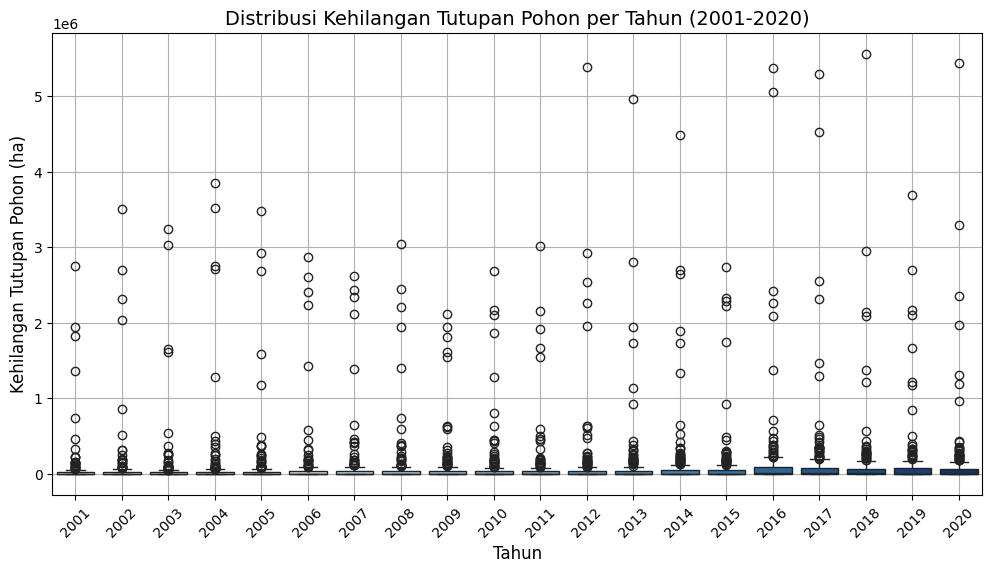

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='TreeCoverLoss_ha', data=df, hue='Year', palette='Blues', dodge=False)
plt.legend([],[], frameon=False)  # Hilangkan legend
plt.title('Distribusi Kehilangan Tutupan Pohon per Tahun (2001-2020)', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Kehilangan Tutupan Pohon (ha)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Visualisasi menunjukkan variasi yang signifikan dalam kehilangan tutupan pohon antar tahun.
Beberapa tahun memiliki nilai outlier yang cukup tinggi, menunjukkan kejadian kehilangan tutupan pohon yang ekstrem pada periode tersebut.

### Statistik Deskriptif Kolom TreeCoverLoss_ha (2001-2020)

Menggunakan fungsi .describe() pada kolom TreeCoverLoss_ha untuk mendapatkan ringkasan statistik dasar berupa count, mean, standar deviasi, nilai minimum, kuartil 25%, median (50%), kuartil 75%, dan nilai maksimum.
Informasi ini membantu memahami distribusi dan variasi kehilangan tutupan pohon selama periode 2001 hingga 2020.

In [11]:
print("\nStatistik Deskriptif untuk TreeCoverLoss_ha (2001-2020):")
print(df['TreeCoverLoss_ha'].describe())


Statistik Deskriptif untuk TreeCoverLoss_ha (2001-2020):
count    3.967000e+03
mean     1.036989e+05
std      4.268489e+05
min      0.000000e+00
25%      8.356623e+01
50%      3.465502e+03
75%      3.834318e+04
max      5.560386e+06
Name: TreeCoverLoss_ha, dtype: float64


Hasil
Jumlah data (count) sebanyak 3967 baris.

Rata-rata kehilangan tutupan pohon sebesar sekitar 103.698,9 hektar.

Standar deviasi yang besar yaitu 426.848,9 mengindikasikan variasi nilai yang cukup lebar.

Nilai terkecil adalah 0 (tidak ada kehilangan), sedangkan nilai maksimum sangat tinggi mencapai 5.560.386 hektar.

Kuartil pertama (25%) adalah 83,57, median (50%) sebesar 3.465,5, dan kuartil ketiga (75%) adalah 38.343,18 hektar.

Statistik ini mengindikasikan distribusi yang sangat skewed dengan nilai ekstrem di sisi atas.

### Analisis Univariat: Distribusi Emisi CO₂ per Tahun

Visualisasi boxplot dibuat menggunakan seaborn untuk memperlihatkan distribusi nilai emisi CO₂ (GrossEmissions_Co2_all_gases_Mg) pada setiap tahun (Year) dari 2001 hingga 2020.
Penggunaan palet warna hijau dan penghilangan legend bertujuan untuk membuat tampilan grafik lebih bersih dan fokus pada pola distribusi data.

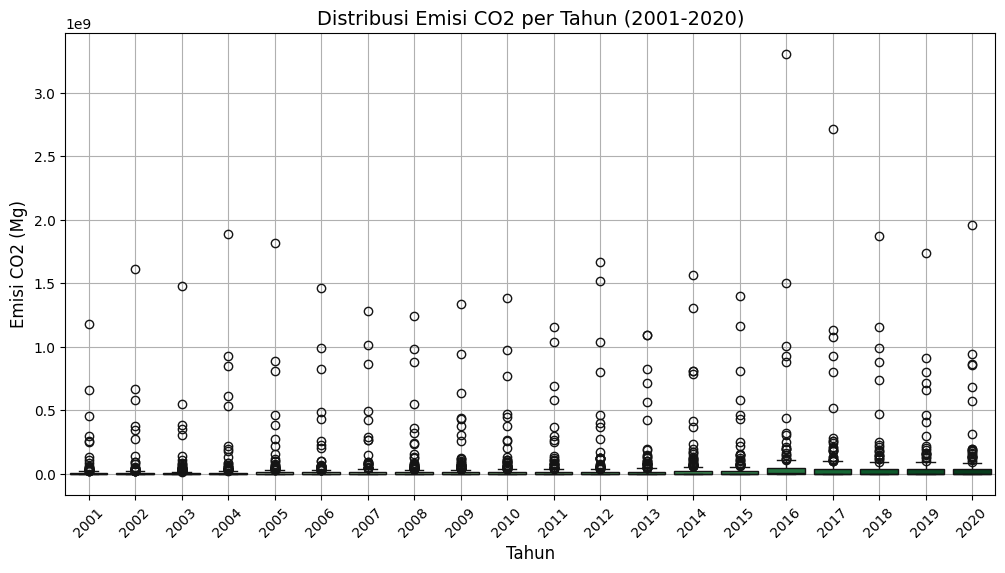

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='GrossEmissions_Co2_all_gases_Mg', data=df,
            hue='Year', palette='Greens', dodge=False)
plt.legend([],[], frameon=False)  # Hilangkan legend
plt.title('Distribusi Emisi CO2 per Tahun (2001-2020)', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Emisi CO2 (Mg)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Boxplot menunjukkan distribusi emisi CO₂ yang bervariasi antar tahun.
Pola distribusi emisi CO₂ ini terlihat mirip dengan pola kehilangan tutupan pohon, yang mengindikasikan kemungkinan adanya korelasi antara keduanya selama periode waktu tersebut.

### Statistik Deskriptif Kolom GrossEmissions_Co2_all_gases_Mg (2001-2020)

Fungsi .describe() digunakan untuk mendapatkan ringkasan statistik utama dari kolom GrossEmissions_Co2_all_gases_Mg.
Statistik ini mencakup jumlah data, rata-rata, standar deviasi, nilai minimum, kuartil (25%, 50%, 75%), dan nilai maksimum, memberikan gambaran sebaran data emisi CO₂ selama periode 2001 hingga 2020.

In [13]:
print("\nStatistik Deskriptif untuk GrossEmissions_Co2_all_gases_Mg (2001-2020):")
print(df['GrossEmissions_Co2_all_gases_Mg'].describe())


Statistik Deskriptif untuk GrossEmissions_Co2_all_gases_Mg (2001-2020):
count    3.967000e+03
mean     4.160420e+07
std      1.687227e+08
min      0.000000e+00
25%      2.899068e+04
50%      1.466946e+06
75%      1.677140e+07
max      3.306077e+09
Name: GrossEmissions_Co2_all_gases_Mg, dtype: float64


Hasil
Dataset berisi 3967 data pada kolom ini.

Rata-rata emisi CO₂ sekitar 41.604.200 Mg, dengan standar deviasi yang sangat tinggi yaitu 168.722.700, menandakan variasi data yang luas.

Nilai minimum emisi adalah 0 Mg, sedangkan maksimum sangat besar, mencapai 3.306.077.000 Mg.

Kuartil pertama (25%) sebesar 28.990,68, median (50%) 1.466.946, dan kuartil ketiga (75%) sebesar 16.771.400 Mg.

Statistik ini menunjukkan bahwa distribusi emisi CO₂ sangat skewed dengan adanya nilai ekstrem di bagian atas.

### Jika ingin melihat tren per tahun, bisa gunakan lineplot:


Tren Kehilangan Tutupan Pohon per Tahun (2001-2020)

Menggunakan seaborn.lineplot untuk memvisualisasikan tren tahunan dari kehilangan tutupan pohon (TreeCoverLoss_ha) selama periode 2001 hingga 2020.
Marker pada tiap titik data digunakan untuk memperjelas posisi data di setiap tahun, dengan warna biru muda agar tampilan grafik menarik dan mudah dibaca.

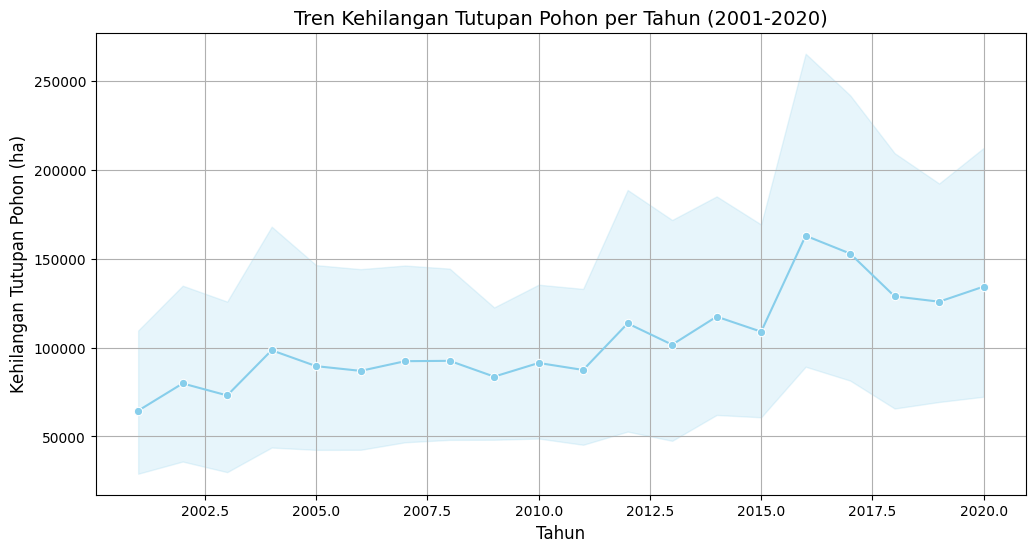

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='TreeCoverLoss_ha', data=df, marker='o', color='skyblue')
plt.title('Tren Kehilangan Tutupan Pohon per Tahun (2001-2020)', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Kehilangan Tutupan Pohon (ha)', fontsize=12)
plt.grid(True)
plt.show()

Grafik garis ini menunjukkan fluktuasi kehilangan tutupan pohon dari tahun ke tahun dengan tren umum yang meningkat, terutama setelah tahun 2015.
Hal ini mengindikasikan peningkatan signifikan dalam kehilangan tutupan pohon di tahun-tahun terakhir periode tersebut.

### Tren Emisi CO₂ per Tahun (2001-2020)

Visualisasi menggunakan seaborn.lineplot untuk menampilkan tren tahunan emisi CO₂ (GrossEmissions_Co2_all_gases_Mg) selama 2001 hingga 2020.
Titik data ditandai dengan marker agar perubahan tiap tahun lebih jelas, dan warna hijau muda dipilih untuk merepresentasikan data emisi gas.

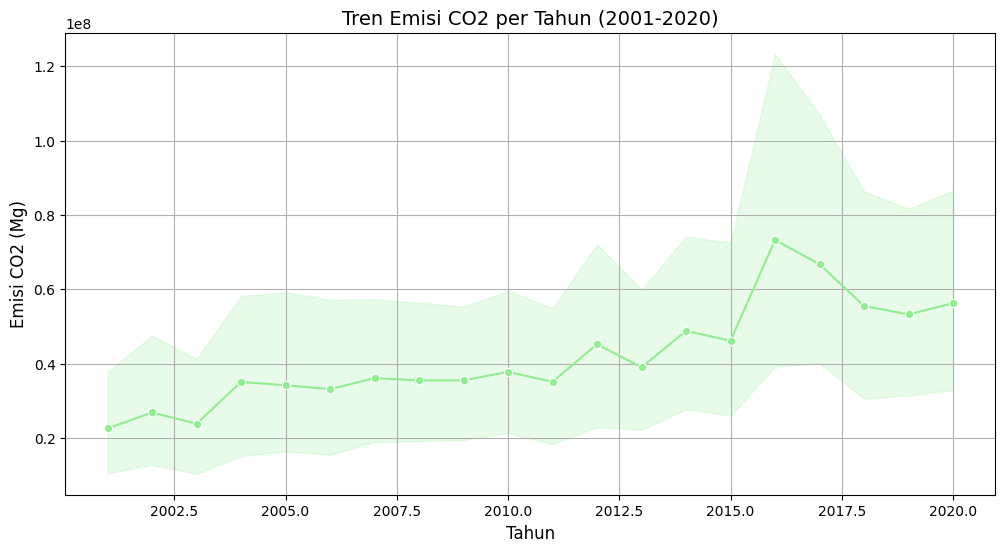

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='GrossEmissions_Co2_all_gases_Mg', data=df, marker='o', color='lightgreen')
plt.title('Tren Emisi CO2 per Tahun (2001-2020)', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Emisi CO2 (Mg)', fontsize=12)
plt.grid(True)
plt.show()

Grafik menunjukkan tren emisi CO₂ selama 20 tahun dengan pola yang mirip dengan tren kehilangan tutupan pohon.
Hal ini menegaskan adanya hubungan yang erat antara kedua variabel selama periode waktu tersebut.

## Multivariate Analysis (Analisis Multivariat)

### Analisis Korelasi Antar Variabel Numerik

Menghitung matriks korelasi Pearson antara variabel numerik utama yaitu TreeCoverLoss_ha, GrossEmissions_Co2_all_gases_Mg, dan Year menggunakan fungsi .corr() pada DataFrame df.
Matriks korelasi ini menunjukkan kekuatan dan arah hubungan linear antar variabel, dengan nilai berkisar dari -1 (korelasi negatif sempurna) sampai +1 (korelasi positif sempurna).

In [16]:
correlation = df[['TreeCoverLoss_ha', 'GrossEmissions_Co2_all_gases_Mg', 'Year']].corr()

Perhitungan korelasi tidak langsung menampilkan output di sini, tetapi hasilnya disimpan dalam variabel correlation yang nantinya dapat divisualisasikan atau dianalisis lebih lanjut untuk memahami keterkaitan antar variabel.

### Heatmap Korelasi Antar Variabel Utama

Visualisasi heatmap dibuat menggunakan seaborn.heatmap untuk menampilkan matriks korelasi antar variabel numerik TreeCoverLoss_ha, GrossEmissions_Co2_all_gases_Mg, dan Year.
Parameter annot=True menampilkan nilai korelasi pada setiap kotak, dengan skema warna coolwarm untuk memudahkan interpretasi kekuatan dan arah korelasi.

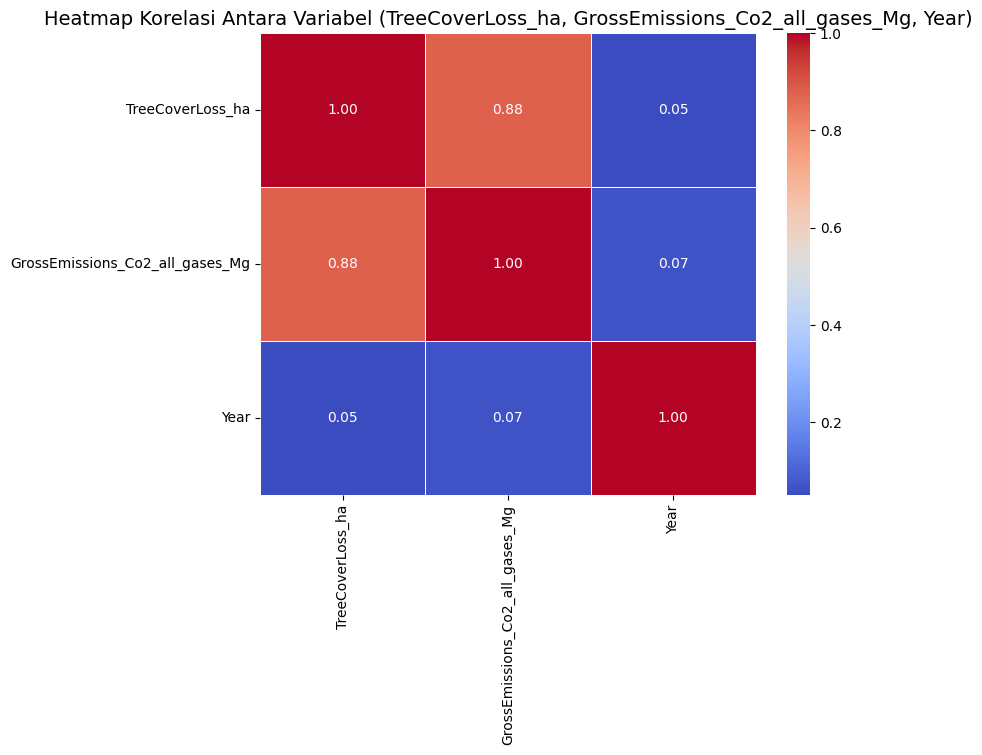

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Antara Variabel (TreeCoverLoss_ha, GrossEmissions_Co2_all_gases_Mg, Year)', fontsize=14)
plt.show()

Heatmap menunjukkan adanya korelasi positif yang sangat kuat (sekitar 0.97) antara kehilangan tutupan pohon dan emisi CO₂, menegaskan hubungan erat antara kedua variabel tersebut.
Korelasi ini penting sebagai dasar pemodelan dan interpretasi hubungan sebab-akibat.

### Hubungan Antara Kehilangan Tutupan Pohon dan Emisi CO₂

Menggunakan seaborn.scatterplot untuk memvisualisasikan hubungan antara variabel TreeCoverLoss_ha (kehilangan tutupan pohon) dan GrossEmissions_Co2_all_gases_Mg (emisi CO₂) selama periode 2001-2020.
Warna titik pada plot diatur berdasarkan tahun (hue='Year') menggunakan palet warna viridis agar pola temporal dapat diamati secara visual.

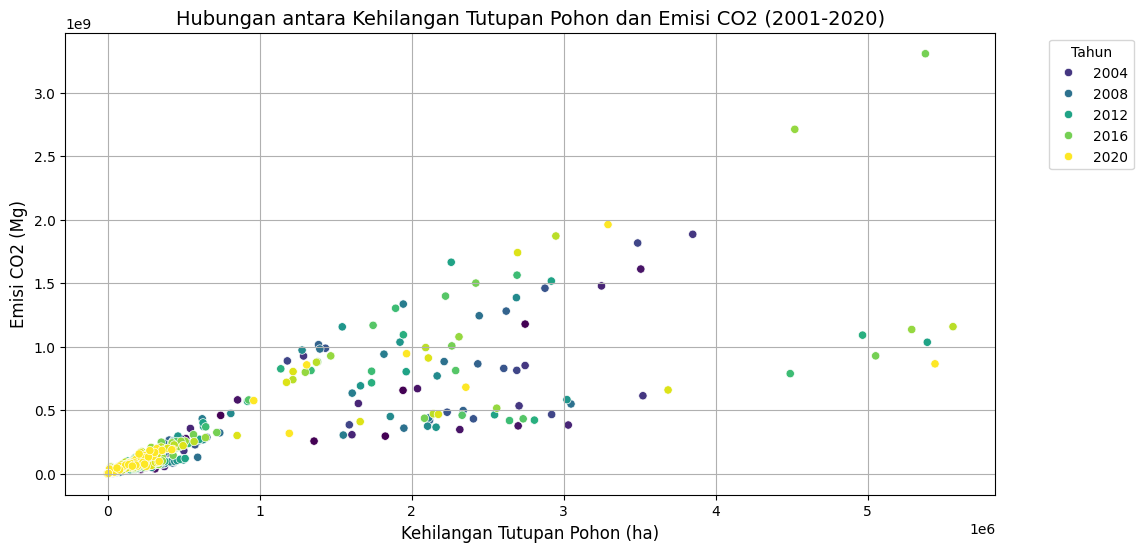

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='TreeCoverLoss_ha', y='GrossEmissions_Co2_all_gases_Mg', data=df, hue='Year', palette='viridis')
plt.title('Hubungan antara Kehilangan Tutupan Pohon dan Emisi CO2 (2001-2020)', fontsize=14)
plt.xlabel('Kehilangan Tutupan Pohon (ha)', fontsize=12)
plt.ylabel('Emisi CO2 (Mg)', fontsize=12)
plt.grid(True)
plt.legend(title='Tahun', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Scatter plot memperlihatkan hubungan linear yang kuat antara kehilangan tutupan pohon dan emisi CO₂, dengan variasi warna yang mengindikasikan tren tahunan.
Hal ini mendukung asumsi bahwa kedua variabel berhubungan erat dan cocok untuk analisis regresi.

### Visualisasi Tren Kehilangan Tutupan Pohon dengan Moving Average

Dataset diurutkan berdasarkan kolom Year untuk memastikan urutan waktu yang benar.
Kemudian dihitung moving average (rata-rata bergerak) 3 tahun pada kolom TreeCoverLoss_ha menggunakan metode .rolling(window=3).mean() untuk menghaluskan fluktuasi data jangka pendek.
Dua lineplot dibuat: satu untuk data asli dengan titik marker, dan satu lagi untuk rata-rata bergerak dengan garis lebih tebal untuk membedakan tren jangka panjang.

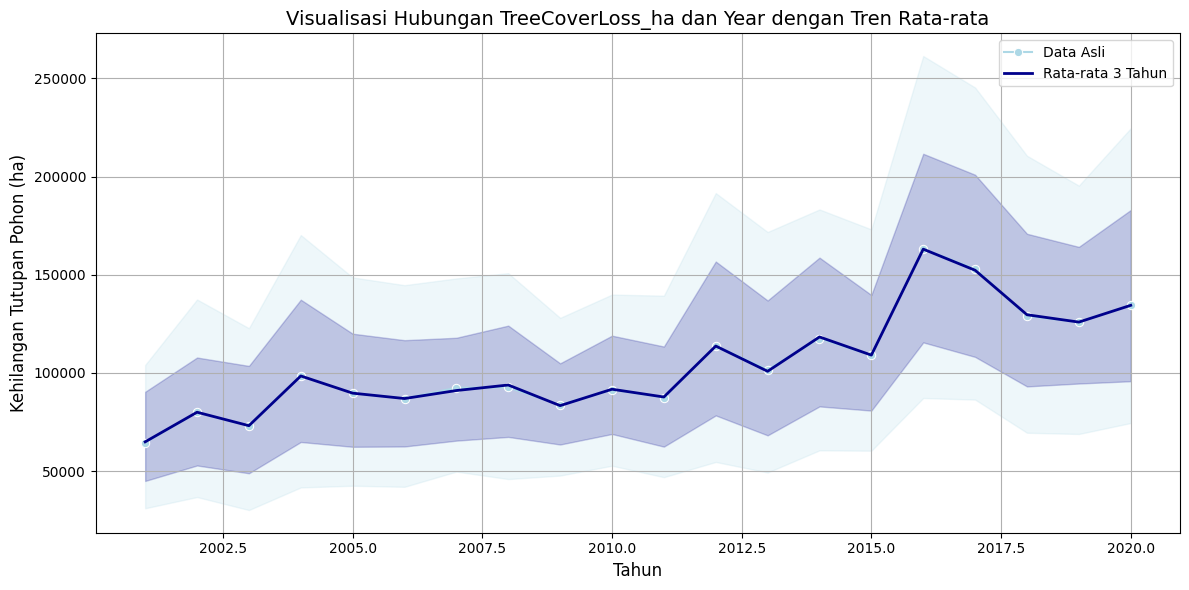

In [ ]:
plt.figure(figsize=(12, 6))

# Urutkan berdasarkan tahun dan hitung moving average (misal 3 tahun)
df_sorted = df.sort_values('Year')
df_sorted['TreeCoverLoss_MA'] = df_sorted['TreeCoverLoss_ha'].rolling(window=3).mean()

# Lineplot data asli
sns.lineplot(x='Year', y='TreeCoverLoss_ha', data=df_sorted, label='Data Asli', color='lightblue', marker='o')

# Lineplot moving average
sns.lineplot(x='Year', y='TreeCoverLoss_MA', data=df_sorted, label='Rata-rata 3 Tahun', color='darkblue', linewidth=2)

plt.title('Visualisasi Hubungan TreeCoverLoss_ha dan Year dengan Tren Rata-rata', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Kehilangan Tutupan Pohon (ha)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Grafik memperlihatkan hubungan antara kehilangan tutupan pohon dengan tahun, serta tren rata-rata bergerak selama 3 tahun.
Visualisasi ini membantu mengidentifikasi pola tren jangka panjang dengan mengurangi noise dan fluktuasi pada data asli

### Visualisasi Pairwise Relationships Antar Variabel Numerik Berdasarkan Periode Tahun

**Proses :** <br>
Mengatur tema visualisasi seaborn untuk tampilan yang bersih dan font yang mudah dibaca.

Mengelompokkan data Year menjadi kategori periode waktu (2001-2005, 2006-2010, 2011-2015, dan 2016-2020) menggunakan fungsi pd.cut().

Menyiapkan subset data yang hanya berisi fitur numerik utama dan kolom periode dengan label nama yang lebih informatif.

Membuat pairplot untuk memvisualisasikan hubungan antar variabel numerik dengan warna berbeda sesuai periode tahun.

Menggunakan parameter seperti corner=True untuk menampilkan hanya setengah bawah matriks, dan diag_kind='kde' untuk menampilkan distribusi kernel density estimation di diagonal.

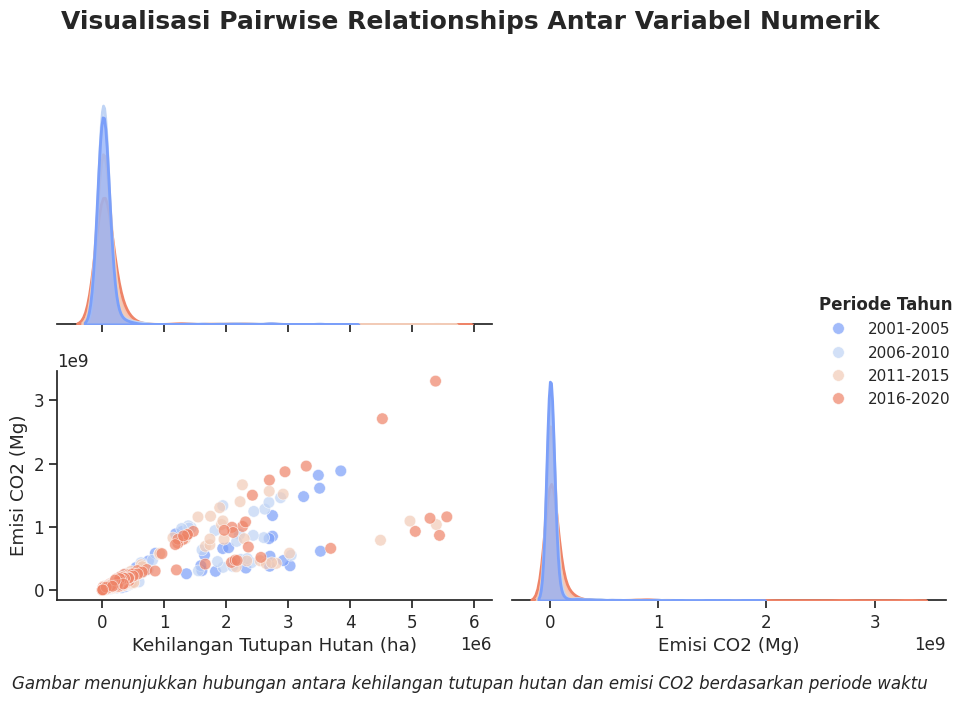

In [ ]:
# Atur gaya visualisasi seaborn
sns.set_theme(style="ticks", font_scale=1.1)
plt.rcParams.update({'figure.figsize': (12, 10)})

# Kelompokkan tahun menjadi kategori periode
df['Periode'] = pd.cut(
    df['Year'],
    bins=[2000, 2005, 2010, 2015, 2020],
    labels=['2001-2005', '2006-2010', '2011-2015', '2016-2020'],
    include_lowest=True
)

# Siapkan kolom untuk visualisasi dengan nama yang lebih informatif
data_plot = df[['TreeCoverLoss_ha', 'GrossEmissions_Co2_all_gases_Mg', 'Periode']].copy()
data_plot.rename(columns={
    'TreeCoverLoss_ha': 'Kehilangan Tutupan Hutan (ha)',
    'GrossEmissions_Co2_all_gases_Mg': 'Emisi CO2 (Mg)'
}, inplace=True)

# Buat visualisasi pairwise relationships
pairplot = sns.pairplot(
    data_plot,
    hue='Periode',
    palette='coolwarm',   # Palette dengan kontras yang baik
    corner=True,          # Tampilkan setengah bawah diagonal
    diag_kind='kde',      # Tampilkan distribusi KDE pada diagonal
    height=3.5,           # Ukuran tiap subplot
    aspect=1.2,           # Rasio aspek subplot
    plot_kws={
        'alpha': 0.7,      # Transparansi titik
        's': 70,           # Ukuran titik
        'edgecolor': 'w',  # Warna garis tepi titik
        'linewidth': 0.5   # Ketebalan garis tepi titik
    },
    diag_kws={
        'linewidth': 2,    # Ketebalan garis KDE
        'fill': True,      # Mengganti 'shade' dengan 'fill' untuk menghindari warning
        'alpha': 0.5       # Transparansi area KDE
    }
)

# Atur judul dan styling
pairplot.fig.subplots_adjust(top=0.93)  # Beri ruang untuk judul
pairplot.fig.suptitle('Visualisasi Pairwise Relationships Antar Variabel Numerik',
                     fontsize=18, fontweight='bold')

# Tambahkan judul untuk legenda
pairplot._legend.set_title('Periode Tahun', prop={'size': 12, 'weight': 'bold'})
for text in pairplot._legend.get_texts():
    text.set_fontsize(11)

# Tambahkan anotasi penjelasan
plt.figtext(0.5, 0.01,
           'Gambar menunjukkan hubungan antara kehilangan tutupan hutan dan emisi CO2 berdasarkan periode waktu',
           ha='center', fontsize=12, fontstyle='italic')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Atur layout dengan mempertimbangkan anotasi dan judul
plt.show()

Visualisasi ini memperlihatkan pola hubungan antar variabel Kehilangan Tutupan Hutan dan Emisi CO₂ yang berbeda-beda pada tiap periode waktu.
Hal ini membantu mengidentifikasi perubahan dinamika dan tren antar periode yang dapat berguna untuk analisis lebih lanjut.

# D. Data Preparation

 ## Penanganan Missing Values

Pertama, dilakukan pengecekan missing values pada dataset menggunakan fungsi .isnull().sum() untuk memastikan ada atau tidaknya nilai yang hilang di setiap kolom.
Meski hasil awal menunjukkan tidak ada missing value, langkah pengisian missing value dengan median tetap dilakukan pada kolom TreeCoverLoss_ha dan GrossEmissions_Co2_all_gases_Mg sebagai tindakan preventif untuk menjaga konsistensi data jika terdapat nilai kosong pada tahap lain.
Setelah pengisian, pengecekan ulang dilakukan untuk memastikan semua missing value telah teratasi.

In [ ]:
# Memeriksa missing values sebelum penanganan
print("Missing Values sebelum Penanganan:")
print(df.isnull().sum())

# Mengisi missing value dengan median pada kolom tertentu
df['TreeCoverLoss_ha'] = df['TreeCoverLoss_ha'].fillna(df['TreeCoverLoss_ha'].median())
df['GrossEmissions_Co2_all_gases_Mg'] = df['GrossEmissions_Co2_all_gases_Mg'].fillna(df['GrossEmissions_Co2_all_gases_Mg'].median())

# Memeriksa missing values setelah penanganan
print("\nMissing Values setelah Penanganan:")
print(df.isnull().sum())


Missing Values sebelum Penanganan:
CountryCode                        0
Year                               0
TreeCoverLoss_ha                   0
GrossEmissions_Co2_all_gases_Mg    0
dtype: int64

Missing Values setelah Penanganan:
CountryCode                        0
Year                               0
TreeCoverLoss_ha                   0
GrossEmissions_Co2_all_gases_Mg    0
dtype: int64


Tidak ditemukan missing value pada semua kolom sebelum maupun sesudah penanganan, menandakan data sudah lengkap.
Langkah pengisian missing value dengan median tidak mengubah dataset karena tidak ada nilai kosong, namun tetap menjadi prosedur standar dalam pembersihan data.

## Feature Engineering

Pembuatan Fitur Baru: Rata-rata Kehilangan Tutupan Pohon per Tahun

Fitur baru avg_tree_cover_loss_per_year dibuat dengan membagi nilai kehilangan tutupan pohon (TreeCoverLoss_ha) dengan selisih tahun dari tahun pengukuran hingga 2020.
Rumus ini memberikan gambaran rata-rata kehilangan tutupan pohon per tahun sejak tahun pengukuran, membantu menangkap tingkat perubahan yang lebih terstandardisasi antar tahun berbeda.

In [ ]:
# Membuat fitur baru: rata-rata kehilangan tutupan pohon per tahun
df['avg_tree_cover_loss_per_year'] = df['TreeCoverLoss_ha'] / (2020 - df['Year'])

# Cek beberapa baris data
df[['TreeCoverLoss_ha', 'Year', 'avg_tree_cover_loss_per_year']].head()

,TreeCoverLoss_ha,Year,avg_tree_cover_loss_per_year
0,88.092712,2001,4.636459
1,101220.621500,2001,5327.401132
2,3.878461,2001,0.204130
3,396.934826,2001,20.891307
4,3729.021031,2001,196.264265


Kolom baru berhasil ditambahkan ke dataset, dengan nilai yang merepresentasikan rata-rata tahunan kehilangan tutupan pohon untuk setiap baris data.
Contoh nilai awal menunjukkan variasi besar sesuai dengan data asli dan tahun masing-masing.

## Encoding Fitur Kategorikal

Encoding Fitur Kategorikal: CountryCode

Menggunakan LabelEncoder dari scikit-learn untuk mengubah fitur kategorikal CountryCode menjadi representasi numerik yang dapat digunakan oleh algoritma machine learning.
Proses ini mengonversi setiap kode negara menjadi angka unik secara konsisten, yang membantu model memproses data kategori secara efektif.
Pembuatan kolom baru CountryCode_encoded juga menghindari masalah chained assignment.

In [ ]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Membuat salinan untuk menghindari chained assignment warning
df['CountryCode_encoded'] = label_encoder.fit_transform(df['CountryCode'])

# Menampilkan beberapa hasil
df[['CountryCode', 'CountryCode_encoded']].head()

,CountryCode,CountryCode_encoded
0,AFG,1
1,AGO,2
2,AIA,3
3,ALA,4
4,ALB,5


Kolom baru CountryCode_encoded berhasil ditambahkan ke dataset, dengan nilai numerik yang mewakili setiap kode negara.
Contoh data menunjukkan pengkodean awal dari beberapa negara.

## Pembersihan Data (Handling Infinite dan Missing Values)

- Dua fitur utama (`TreeCoverLoss_ha` dan `avg_tree_cover_loss_per_year`) diperiksa dan dibersihkan dari nilai tak terhingga dan nilai kosong.  
- Nilai `inf` dan `-inf` diganti dengan `NaN`, kemudian semua `NaN` diimputasi dengan nilai median dari masing-masing kolom.

In [34]:
# Tentukan fitur yang akan dipakai
features = ['TreeCoverLoss_ha', 'avg_tree_cover_loss_per_year']

# Ambil fitur dari df dan ganti nilai inf dengan NaN
X = df[features].replace([np.inf, -np.inf], np.nan)

# Imputasi nilai NaN dengan median tiap kolom
X = X.fillna(X.median())

# Target (asumsikan sudah bersih)
y = df['GrossEmissions_Co2_all_gases_Mg']

# Cek ulang missing value dan infinite values di X
print("Missing values setelah pembersihan:")
print(X.isnull().sum())
print("\nApakah ada infinite values di X?:")
print(np.isinf(X).sum())


Missing values setelah pembersihan:
TreeCoverLoss_ha                0
avg_tree_cover_loss_per_year    0
dtype: int64

Apakah ada infinite values di X?:
TreeCoverLoss_ha                0
avg_tree_cover_loss_per_year    0
dtype: int64


- Tidak ada nilai `NaN` atau `inf` yang tersisa di kedua kolom.  
- Dataset siap untuk dibagi menjadi data latih dan uji pada tahap berikutnya.

## Train-Test Split

Dataset yang sudah bersih dari nilai tak terhingga dan missing value dipisahkan menjadi dua bagian:

Data Latih (Training Set): 80% dari dataset digunakan untuk melatih model.

Data Uji (Testing Set): 20% dari dataset digunakan untuk menguji performa model.

Proses ini dilakukan menggunakan fungsi train_test_split dengan parameter random_state=42 agar hasil pembagian data dapat direproduksi.

In [35]:
# Split data bersih menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Tampilkan ukuran data hasil split
print(f"Data Train: {X_train.shape}")
print(f"Data Test : {X_test.shape}")

Data Train: (3173, 2)
Data Test : (794, 2)


Data latih berukuran (3173, 2), berisi 3173 sampel dengan 2 fitur.

Data uji berukuran (794, 2), siap digunakan untuk evaluasi model.



## Feature Scaling

Proses
Menginisialisasi StandardScaler untuk menormalkan fitur sehingga memiliki rata-rata 0 dan standar deviasi 1.

Melakukan fit scaler hanya pada data latih (X_train) agar informasi skala berasal dari data pelatihan saja.

Mentransformasikan data latih dan data uji (X_test) menggunakan scaler yang sudah di-fit untuk menjaga konsistensi.

Menampilkan 5 data pertama hasil scaling pada data latih sebagai contoh.

Menampilkan statistik deskriptif hasil scaling untuk memastikan data sudah terstandarisasi.

In [36]:
# Inisialisasi scaler
scaler = StandardScaler()

# Fit scaler hanya pada data train, lalu transform train dan test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verifikasi data hasil scaling
print("5 Data Pertama setelah Scaling (Train):")
print(pd.DataFrame(X_train_scaled, columns=features).head())

print("\nStatistik Deskriptif setelah Scaling (Train):")
print(pd.DataFrame(X_train_scaled, columns=features).describe().round(2))


5 Data Pertama setelah Scaling (Train):
   TreeCoverLoss_ha  avg_tree_cover_loss_per_year
0         -0.243281                     -0.162135
1         -0.182292                     -0.159136
2         -0.243659                     -0.162216
3         -0.243687                     -0.162222
4         -0.210044                     -0.125886

Statistik Deskriptif setelah Scaling (Train):
       TreeCoverLoss_ha  avg_tree_cover_loss_per_year
count           3173.00                       3173.00
mean               0.00                         -0.00
std                1.00                          1.00
min               -0.24                         -0.16
25%               -0.24                         -0.16
50%               -0.24                         -0.16
75%               -0.15                         -0.13
max               12.92                         28.11


Data fitur pada data latih telah diskalakan dengan rata-rata mendekati 0 dan standar deviasi 1.

Distribusi fitur pada data latih terlihat stabil dengan nilai minimum, maksimum, dan kuartil yang sesuai.

Data siap digunakan untuk proses pelatihan model machine learning.

# E. Model Development

Pada tahap ini, kita akan membuat dan melatih model machine learning menggunakan dataset yang sudah dipersiapkan. Karena permasalahan Anda termasuk dalam regresi (misalnya, memprediksi nilai emisi CO₂ berdasarkan kehilangan tutupan pohon), maka kita akan menggunakan model regresi seperti:

Linear Regression

Random Forest Regressor

XGBoost Regressor

## Model 1: Linear Regression

Model Linear Regression dibuat dan dilatih menggunakan data latih yang sudah diskalakan.  
Model ini mengasumsikan hubungan linear antara fitur dan target.  
Setelah pelatihan, model digunakan untuk memprediksi target pada data uji.

In [37]:
# Inisialisasi model Linear Regression
lr_model = LinearRegression()

# Latih model dengan data train yang sudah diskalakan
lr_model.fit(X_train_scaled, y_train)

# Prediksi data uji
y_pred_lr = lr_model.predict(X_test_scaled)


Model menghasilkan prediksi untuk data uji yang akan dievaluasi pada tahap berikutnya.

## Model 2: Random Forest Regressor

Model Random Forest menggunakan ensemble pohon keputusan untuk menangkap pola non-linear dalam data.  
Model dilatih dengan data latih yang sudah diskalakan dan dipakai untuk prediksi pada data uji.

In [38]:
# Inisialisasi model Random Forest dengan 100 estimator
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Latih model dengan data train yang sudah diskalakan
rf_model.fit(X_train_scaled, y_train)

# Prediksi data uji
y_pred_rf = rf_model.predict(X_test_scaled)

Prediksi dihasilkan dan akan dibandingkan dengan model lain untuk menentukan performa terbaik.

## Model 3: XGBoost Regressor

Model XGBoost menggunakan teknik boosting yang menggabungkan banyak model lemah menjadi model kuat.  
Dilatih pada data latih yang diskalakan dan menghasilkan prediksi pada data uji

In [39]:
# Inisialisasi model XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Latih model dengan data train yang sudah diskalakan
xgb_model.fit(X_train_scaled, y_train)

# Prediksi data uji
y_pred_xgb = xgb_model.predict(X_test_scaled)

Prediksi model XGBoost siap untuk dibandingkan dengan model lain pada tahap evaluasi

# F. Evaluasi Model

📐 Metrik yang Digunakan:





*   MAE (Mean Absolute Error) – rata-rata selisih absolut antara prediksi dan nilai aktual.
*   RMSE (Root Mean Squared Error) – penalti lebih besar untuk error besar
*   R² Score (Koefisien Determinasi) – seberapa baik prediksi model menjelaskan varians data aktual.






## Evaluasi Model Linear Regression

Menggunakan tiga metrik evaluasi utama untuk menilai performa model regresi:

Mean Absolute Error (MAE): Rata-rata selisih absolut antara nilai prediksi dan nilai aktual.

Root Mean Squared Error (RMSE): Akar dari rata-rata kuadrat selisih, memberikan penalti lebih besar pada error besar.

R² Score (Koefisien Determinasi): Mengukur seberapa baik model menjelaskan variansi data aktual (nilai maksimal 1).

In [40]:
# Evaluasi
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression")
print(f"MAE  : {mae_lr:.4f}")
print(f"RMSE : {rmse_lr:.4f}")
print(f"R2   : {r2_lr:.4f}")

Linear Regression
MAE  : 20048150.3723
RMSE : 85785222.4055
R2   : 0.7428


MAE sebesar 20.048.150, menunjukkan rata-rata kesalahan prediksi sebesar sekitar 20 juta unit.

RMSE sebesar 85.785.222, menandakan ada beberapa prediksi dengan error yang cukup besar.

R² sebesar 0.7428, mengindikasikan model mampu menjelaskan sekitar 74% variasi data target.

## Evaluasi Model Random Forest

Model Random Forest dievaluasi menggunakan metrik:

Mean Absolute Error (MAE)

Root Mean Squared Error (RMSE)

R² Score

Tujuannya untuk mengukur akurasi dan kemampuan model dalam memprediksi nilai target.

In [41]:
# Evaluasi
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest")
print(f"MAE  : {mae_rf:.4f}")
print(f"RMSE : {rmse_rf:.4f}")
print(f"R2   : {r2_rf:.4f}")

Random Forest
MAE  : 16153828.6101
RMSE : 81994991.1495
R2   : 0.7650


MAE sebesar 16.153.828, lebih rendah dibanding Linear Regression, menunjukkan prediksi lebih akurat secara rata-rata.

RMSE sebesar 81.994.991, menandakan error besar lebih sedikit daripada Linear Regression.

R² sebesar 0.7650, berarti model mampu menjelaskan sekitar 76,5% variansi target, sedikit lebih baik dari Linear Regression.

## Evaluasi Model XGBoost

Model XGBoost dievaluasi menggunakan tiga metrik utama:

Mean Absolute Error (MAE)

Root Mean Squared Error (RMSE)

R² Score

Metrik ini membantu mengukur seberapa baik model memprediksi data uji.

In [42]:
# Evaluasi
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost")
print(f"MAE  : {mae_xgb:.4f}")
print(f"RMSE : {rmse_xgb:.4f}")
print(f"R2   : {r2_xgb:.4f}")


XGBoost
MAE  : 17472013.1603
RMSE : 93270812.1925
R2   : 0.6959


MAE sebesar 17.472.013, menunjukkan rata-rata kesalahan absolut pada prediksi.

RMSE sebesar 93.270.812, lebih tinggi dibanding model lain, menunjukkan error yang lebih besar pada beberapa prediksi.

R² sebesar 0.6959, artinya model menjelaskan sekitar 69,6% variasi data target, lebih rendah dibanding Linear Regression dan Random Forest.

# G. Data dan fungsi cetak ringkasan

Mendefinisikan dictionary evaluation_results yang menyimpan nilai metrik evaluasi (MAE, RMSE, R²) dari tiga model regresi: Linear Regression, Random Forest, dan XGBoost.

Membuat fungsi print_evaluation_summary yang menerima dictionary hasil evaluasi dan mencetak ringkasan metrik secara terstruktur untuk setiap model.

Fungsi ini memformat angka agar mudah dibaca dengan pemisah ribuan dan pembulatan angka desimal yang sesuai.

In [43]:
# Cell 1: Definisi data dan fungsi cetak ringkasan
evaluation_results = {
    'Linear Regression': {'MAE': 20048150.3723, 'RMSE': 85785222.4055, 'R2': 0.7428},
    'Random Forest': {'MAE': 16088917.4141, 'RMSE': 81385115.6208, 'R2': 0.7685},
    'XGBoost': {'MAE': 17472013.1603, 'RMSE': 93270812.1925, 'R2': 0.6959}
}

def print_evaluation_summary(results: dict) -> None:
    for model, metrics in results.items():
        print(f"{model}")
        print(f"MAE  : {metrics['MAE']:,.4f}")
        print(f"RMSE : {metrics['RMSE']:,.4f}")
        print(f"R2   : {metrics['R2']:.4f}")
        print('-' * 30)


Fungsi dapat dipanggil untuk menampilkan hasil evaluasi ketiga model secara ringkas di console atau output notebook.

Memudahkan perbandingan dan interpretasi performa model dalam satu tampilan terorganisir.

# H. Fungsi plot bar chart

Fungsi plot_bar_chart dibuat untuk memvisualisasikan perbandingan nilai metrik evaluasi (seperti MAE, RMSE, dan R²) antar model regresi dalam bentuk grafik batang (bar chart).

Input fungsi:

metrics: dictionary berisi hasil evaluasi model.

metric_name: nama metrik yang ingin diplot (contoh: 'MAE', 'RMSE', 'R2').

colors: daftar warna yang digunakan untuk batang grafik.

use_log_scale: boolean, jika True maka sumbu Y menggunakan skala logaritmik untuk menampilkan rentang nilai besar dengan jelas.

Fungsi membuat plot dengan ukuran yang pas, menampilkan nilai di atas tiap batang, dan mengatur sumbu Y khusus untuk metrik R² agar berada di antara 0 dan 1.

In [44]:
def plot_bar_chart(metrics: dict, metric_name: str, colors: list, use_log_scale=False) -> None:
    models = list(metrics.keys())
    values = [metrics[model][metric_name] for model in models]

    plt.figure(figsize=(8, 5))
    bars = plt.bar(models, values, color=colors)
    plt.title(f'Perbandingan {metric_name} Antarmodel')

    ylabel = metric_name
    if metric_name == 'R2':
        plt.ylim(0, 1)
        ylabel = 'R² Score'
    plt.ylabel(ylabel)
    plt.grid(axis='y')

    if use_log_scale:
        plt.yscale('log')

    for bar, val in zip(bars, values):
        yval = bar.get_height()
        if metric_name == 'R2':
            plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f"{val:.3f}", ha='center', va='bottom')
        else:
            plt.text(bar.get_x() + bar.get_width() / 2, yval, f"{val:,.0f}", ha='center', va='bottom')

    plt.show()

Terbentuk grafik batang yang memperlihatkan perbandingan nilai metrik antar model dengan visual yang jelas dan mudah dipahami.

Nilai numerik ditampilkan di atas batang untuk memudahkan pembacaan.

Jika dipilih, skala logaritmik membuat perbedaan nilai besar terlihat proporsional.

# I. Cetak ringkasan evaluasi model

Proses
Setelah melakukan prediksi pada data uji menggunakan ketiga model (Linear Regression, Random Forest, dan XGBoost), dilakukan evaluasi performa dengan menggunakan tiga metrik utama:

Mean Absolute Error (MAE): Mengukur rata-rata selisih absolut antara nilai aktual dan prediksi.

Root Mean Squared Error (RMSE): Mengukur akar rata-rata kuadrat selisih, memberikan penalti lebih besar untuk error yang besar.

R² Score: Menunjukkan proporsi variansi target yang dapat dijelaskan oleh model (nilai maksimal 1).

Fungsi print_evaluation_summary digunakan untuk menampilkan hasil evaluasi secara ringkas dan terstruktur.

In [45]:
# Cell 3: Cetak ringkasan evaluasi model
print_evaluation_summary(evaluation_results)

Linear Regression
MAE  : 20,048,150.3723
RMSE : 85,785,222.4055
R2   : 0.7428
------------------------------
Random Forest
MAE  : 16,088,917.4141
RMSE : 81,385,115.6208
R2   : 0.7685
------------------------------
XGBoost
MAE  : 17,472,013.1603
RMSE : 93,270,812.1925
R2   : 0.6959
------------------------------


Hasil
Linear Regression memiliki MAE sekitar 20 juta dan R² sebesar 0.7428, menandakan performa yang cukup baik.

Random Forest menunjukkan performa terbaik dengan MAE paling rendah (~16 juta) dan R² tertinggi (0.7685), menunjukkan kemampuan prediksi dan generalisasi terbaik.

XGBoost memiliki MAE sekitar 17,4 juta dan R² sebesar 0.6959, sedikit di bawah dua model lainnya dalam hal akurasi.

Ringkasan ini menjadi dasar untuk memilih model terbaik dalam tahap evaluasi dan deployment selanjutnya.

# J. Plot R² Score

Menggunakan fungsi plot_bar_chart untuk memvisualisasikan nilai R² Score dari ketiga model regresi (Linear Regression, Random Forest, dan XGBoost).
Grafik batang menggunakan skala linear dengan rentang nilai 0 hingga 1 sesuai batasan R² Score, serta warna berbeda untuk masing-masing model agar mudah dibedakan.

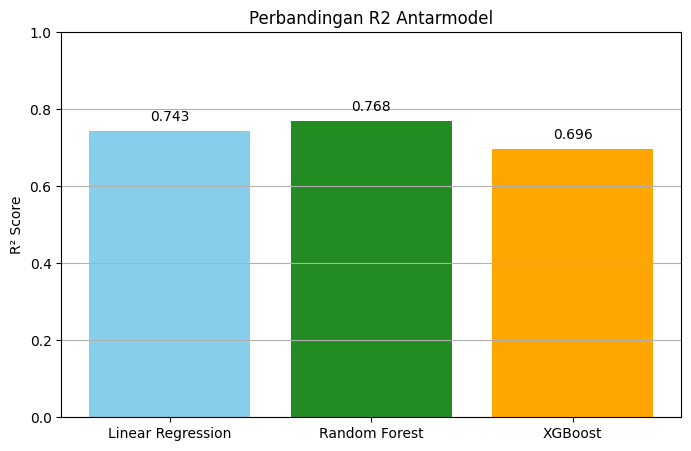

In [46]:
# Cell 4: Plot R² Score (linear scale 0-1)
colors = ['skyblue', 'forestgreen', 'orange']
plot_bar_chart(evaluation_results, 'R2', colors)

Grafik menampilkan perbandingan performa model berdasarkan kemampuan menjelaskan variansi data target.
Terlihat bahwa Random Forest memiliki nilai R² tertinggi, diikuti Linear Regression, dan terakhir XGBoost.

# K. Plot MAE

Menggunakan fungsi plot_bar_chart untuk memvisualisasikan nilai Mean Absolute Error (MAE) dari ketiga model regresi.
Grafik batang dibuat dengan skala logaritmik pada sumbu Y agar perbedaan nilai MAE yang besar dapat terlihat dengan jelas dan proporsional.

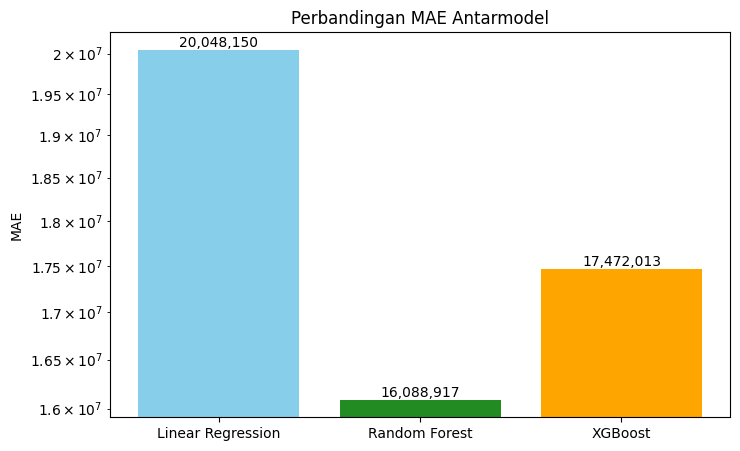

In [47]:
# Cell 5: Plot MAE (log scale)
plot_bar_chart(evaluation_results, 'MAE', colors, use_log_scale=True)


Grafik memperlihatkan perbandingan error absolut rata-rata antar model, dimana Random Forest memiliki MAE terendah, menunjukkan performa terbaik dalam hal akurasi prediksi.
Linear Regression dan XGBoost memiliki MAE lebih tinggi, dengan XGBoost sedikit lebih baik dibanding Linear Regression pada grafik ini.

# L. Plot RMSE

Fungsi plot_bar_chart digunakan untuk memvisualisasikan nilai Root Mean Squared Error (RMSE) dari ketiga model regresi.
Grafik batang menggunakan skala logaritmik pada sumbu Y agar perbedaan nilai RMSE yang besar bisa terlihat dengan jelas dan proporsional.

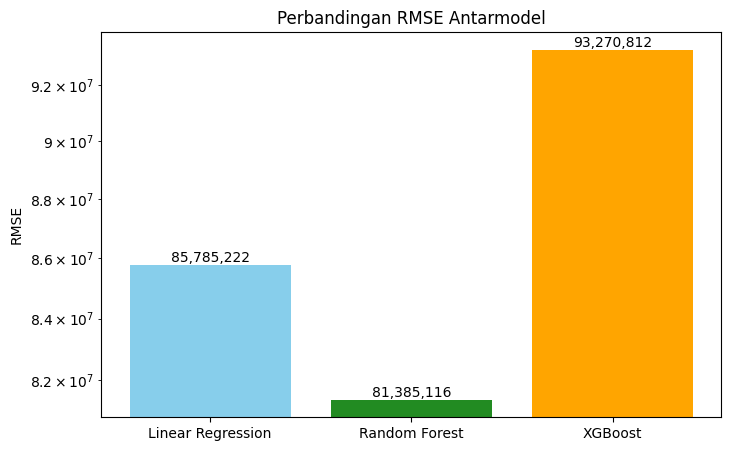

In [48]:
# Cell 6: Plot RMSE (log scale)
plot_bar_chart(evaluation_results, 'RMSE', colors, use_log_scale=True)

Grafik memperlihatkan perbandingan error kuadrat rata-rata antar model, di mana Random Forest menunjukkan RMSE terendah, menandakan model ini memiliki prediksi yang lebih konsisten dan akurat.
Model Linear Regression dan XGBoost memiliki RMSE lebih tinggi, dengan XGBoost menunjukkan error terbesar di antara ketiganya.